# Operational margin heatmap (main figure)
This notebook generates the heatmap for the operational margin
$\Delta_{\mathrm{op}}(\chi, I_{\max})$ and the red contour
$\Delta_{\mathrm{op}} = 0$.

The analytic bound here corresponds to the quadratic excitability case $\kappa=0$ used in the discriminant-style existence condition.

**NOTE**: This notebook imports NOS modules from src/. See the repository README section “Running notebooks” for setup.

In [1]:
from __future__ import annotations

import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

# works for both "repo root" and "repo/src" layouts
REPO_ROOT = Path("..").resolve()
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

try:
    from nos import NOSParams
except Exception:
    from src.nos import NOSParams  # repo/src layout

OUT_DIR = REPO_ROOT / "outputs"
OUT_DIR.mkdir(parents=True, exist_ok=True)


## Parameters (match the paper)

Set these to the exact values used in the manuscript.


In [5]:
# Set these to check the operational margines in different settings.
p = NOSParams(
    alpha=0.10,   # curvature for f_sat (with kappa=0 in this bound)
    kappa=0.0,
    beta=0.80,
    gamma=0.02,
    lam=0.40,     # leak on v (λ)
    chi=0.0,      # χ is swept below; keep p.chi=0 here
    v_rest=0.0,
    a=1.0,
    b=1.0,
    mu=0.20,
)


alpha = p.alpha
kappa = p.kappa
beta  = p.beta
lam   = p.lam
a, b, mu = p.a, p.b, p.mu
gamma = p.gamma
v_rest = p.v_rest

chi_max = 0.50
Imax_max = 0.90
n_chi = 240
n_I = 240


With $\kappa = 0$, the equilibrium condition reduces to a quadratic in $v$
with a discriminant requirement. Writing the effective linear coefficient

$$
L(\chi) = \lambda + \chi + \frac{ab}{a+\mu} - \beta ,
$$

and the constant term

$$
C(\chi) = \gamma + \chi v_{\mathrm{rest}},
$$

the existence condition becomes $\Delta_{\mathrm{op}} \ge 0$, where

$$
\Delta_{\mathrm{op}}(\chi, I_{\max})
= \frac{L(\chi)^2}{4\alpha}
- \bigl(C(\chi) + I_{\max}\bigr).
$$


In [6]:
def L_of_chi(chi: np.ndarray) -> np.ndarray:
    return (beta - lam - chi) - (a * b) / (a + mu)

def C_of_chi(chi: np.ndarray) -> np.ndarray:
    return gamma + chi * v_rest

def delta_op(chi: np.ndarray, Imax: np.ndarray) -> np.ndarray:
    L = L_of_chi(chi)
    C = C_of_chi(chi)
    return (L * L) / (4.0 * alpha) - (C + Imax)


## Plot heatmap and the $\Delta_{\mathrm{op}}=0$ contour

PosixPath('/outputs/fig_op_heat.png')

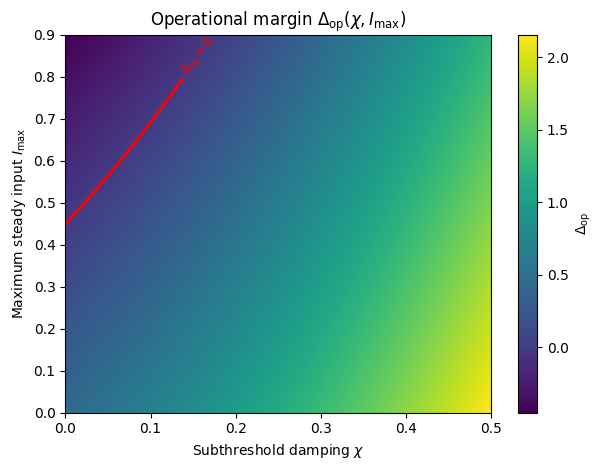

In [7]:
chi = np.linspace(0.0, chi_max, n_chi)
Imax = np.linspace(0.0, Imax_max, n_I)

CHI, IGRID = np.meshgrid(chi, Imax, indexing="xy")   # CHI: (n_I,n_chi)
D = delta_op(CHI, IGRID)

fig, ax = plt.subplots(figsize=(6.2, 4.8))

im = ax.imshow(
    D,
    origin="lower",
    aspect="auto",
    extent=[chi.min(), chi.max(), Imax.min(), Imax.max()],
)

# Red contour Δ_op = 0
cs = ax.contour(chi, Imax, D, levels=[0.0], colors=["red"], linewidths=2.0)
ax.clabel(cs, inline=True, fontsize=9, fmt={0.0: r"$\Delta_{\mathrm{op}}=0$"})

ax.set_xlabel(r"Subthreshold damping $\chi$")
ax.set_ylabel(r"Maximum steady input $I_{\max}$")
ax.set_title(r"Operational margin $\Delta_{\mathrm{op}}(\chi, I_{\max})$")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"$\Delta_{\mathrm{op}}$")

fig.tight_layout()

png_path = OUT_DIR / "fig_op_heat.png"
pdf_path = OUT_DIR / "fig_op_heat.pdf"
fig.savefig(png_path, dpi=300)
fig.savefig(pdf_path)

png_path


## Record parameters for provenance

This prints a small block you can paste into the figure caption or Online Methods.


In [ ]:
params_used = {
    "NOSParams": {
        "alpha": float(p.alpha),
        "kappa": float(p.kappa),
        "beta": float(p.beta),
        "gamma": float(p.gamma),
        "lam": float(p.lam),
        "v_rest": float(p.v_rest),
        "a": float(p.a),
        "b": float(p.b),
        "mu": float(p.mu),
    },
    "sweep": {"chi_max": chi_max, "Imax_max": Imax_max},
    "grid": {"n_chi": n_chi, "n_I": n_I},
}

# Save for provenance (useful for exporting figures)
import json
with open(OUT_DIR / "op_margin_main_params.json", "w", encoding="utf-8") as f:
    json.dump(params_used, f, indent=2)

params_used
